## Introduction

## Imports

In [54]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import random
import plotly.express as px
import altair as alt



#Increases the resolution of the graphs rendered below by changing image format into vector
%config InlineBackend.figure_formats = ['svg']

In [23]:
#Importing the dataset
dataPath = "raw_data"
df = pd.read_csv(dataPath + "/data_salaries.csv")
#Displaying the first 10 instances of the dataset
df[0:10]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [24]:
#Find the number of rows and columns in the dataset
print(df.shape)
#Find the different data types in the dataset
df.dtypes

(3755, 11)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [25]:
# All ten rows of the dataset all display 2023 for work year
# I want to see if there are other unique entries in this column
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

In [26]:
# Summary statistics of the data
# For things like outliers or any weird stuff
print("Summary Statistics of Numerical Variables\n", 
      df.select_dtypes(include = "number").describe(),
     "\n")

print("Summary Statistics of Categorical Variables\n",
      df.select_dtypes(include = "object").describe(),
     "\n")

Summary Statistics of Numerical Variables
          work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000 

Summary Statistics of Categorical Variables
        experience_level employment_type      job_title salary_currency  \
count              3755            3755           3755            3755   
unique                4               4             93              20   
top                  SE              FT  Data Engineer             USD   
freq               2516            3718           1040  

Looking at the above summary statistics we can see that remote ratios may be right skewed as the mean and median do not much. Additionally, for salary outliers may be present as the max value for the salary column is two magnitudes hgiher than the other entries measured in the column. From the categorical variables we can see that there are a lot of unique entries for job title, employee residence, and company location; this suggests that we may have to categorise these variables into smaller cateogories for easier data processing.

In [27]:
# Having a look at whether is there is any missing values for this dataset

print("Summary Statistics of Missing Values \n", 
      df.isnull().sum(axis=0),
     "\n")

Summary Statistics of Missing Values 
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 



No missing values for this dataset! This will make cleaning the data a lot easier.

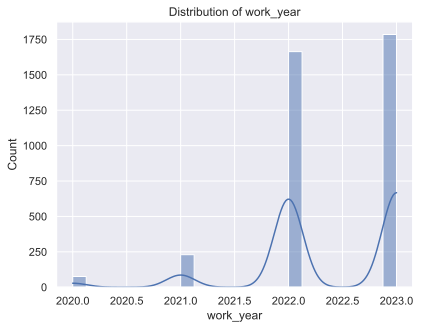

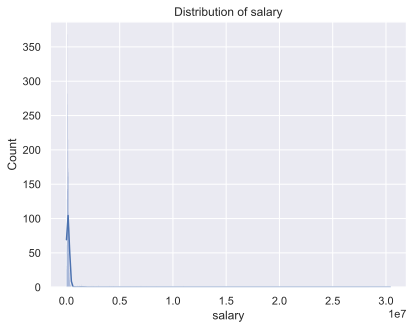

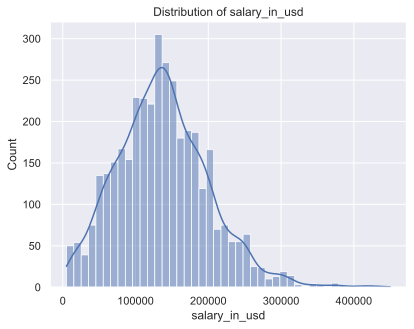

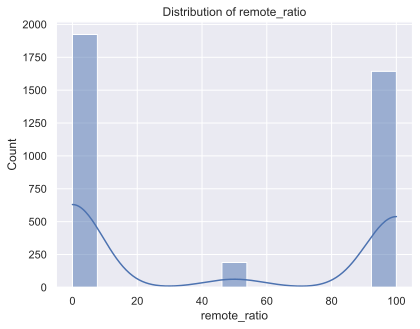

In [28]:
# This looks at the distribution of all numberical data 
for i, v in enumerate(df.select_dtypes(include = "number")):
    sns.histplot(df[v], kde = True)
    plt.title("Distribution of " + v)
    plt.show()

Looking at the above graphs it seems like there are no values for 2020.5, 2021.5 and 2022.5 in the work year column. I want to look at the graph again after removing those arbitary entires. As for salary it seems like the graph looks odd due to the measurement, I will remove the convert it from scientific notation to normal numbers and have a look at the distribution again. However, for salary in USD it appears like it is fairly normally distributed with a slight right skew - don't think we need to do anything here. Remote ratio seems fairly interesting as it illustrates that most people are either work completely from the office or at home while a small minority is hybrid, I do think the data could be represented better which I will proceed to do later. 

In [55]:
alt.Chart(df).mark_bar().encode(
    alt.X('work_year:Q').scale(zero=False),
    y = 'salary',
    color = 'employment_type'
)


alt.Chart(...)